# Test of quantitative developper NGT
## Internship position
## Data and cloud analysis

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import scipy as sp
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
os.getcwd()

'C:\\Users\\sako_\\Videos'

In [5]:
os.chdir(r'C:\Users\sako_\OneDrive\Bureau\Next_gate_tech')
os.getcwd()

'C:\\Users\\sako_\\OneDrive\\Bureau\\Next_gate_tech'

### TASK A: BACK-END

##### **1 ** Importing dataset 

In [6]:
data = pd.read_csv("ngt_software_engineer_test_example_data.csv")
data.head()
data.dtypes

Subfund_Code               int64
Share_Class_Code          object
Valuation_Date            object
Subfund_CCY               object
Net_Asset_Value          float64
Nb_Shares_Outstanding    float64
NAV_Per_Share            float64
CCY_NAV_share             object
ISIN_Code                 object
Nb_Shares_Subscribed     float64
Amount_Subscribed        float64
Nb_Shares_Redeemed       float64
Amount_Redeemed          float64
Subfund_Long_Name        float64
Dividend_Per_Share       float64
Dividend_Payment_Date    float64
Dividend_PCCY              int64
Dividend_Payment_CCY      object
Dividend_Subfund_CCY      object
Total_Net_Assets         float64
dtype: object

In [7]:
data.head()

,Subfund_Code,Share_Class_Code,Valuation_Date,Subfund_CCY,Net_Asset_Value,Nb_Shares_Outstanding,NAV_Per_Share,CCY_NAV_share,ISIN_Code,Nb_Shares_Subscribed,Amount_Subscribed,Nb_Shares_Redeemed,Amount_Redeemed,Subfund_Long_Name,Dividend_Per_Share,Dividend_Payment_Date,Dividend_PCCY,Dividend_Payment_CCY,Dividend_Subfund_CCY,Total_Net_Assets
0,1,A,02/01/2018,EUR,53472989.09,564961.4266,111.6870,EUR,LU1234DEMO1A,0.0000,0.0000,0.0000,0.0000,NaN,0.0,0.0,0,0,EUR,53472989.09
1,1,A,03/01/2018,EUR,53615728.16,564974.2414,111.9820,EUR,LU1234DEMO1A,0.0000,0.0000,0.0000,0.0000,NaN,0.0,0.0,0,0,EUR,53615728.16
2,1,A,04/01/2018,EUR,53706892.15,565337.9646,112.1000,EUR,LU1234DEMO1A,0.0000,0.0000,0.0000,0.0000,NaN,0.0,0.0,0,0,EUR,53706892.15
3,1,A,05/01/2018,EUR,53946703.05,566130.6532,112.4422,EUR,LU1234DEMO1A,25.7948,2441.5616,12.9800,1228.5452,NaN,0.0,0.0,0,0,EUR,53946703.05
4,1,A,08/01/2018,EUR,54051911.14,566282.0000,112.6310,EUR,LU1234DEMO1A,549.7030,52166.4902,185.9798,17649.3662,NaN,0.0,0.0,0,0,EUR,54051911.14


In [8]:
data.tail()

,Subfund_Code,Share_Class_Code,Valuation_Date,Subfund_CCY,Net_Asset_Value,Nb_Shares_Outstanding,NAV_Per_Share,CCY_NAV_share,ISIN_Code,Nb_Shares_Subscribed,Amount_Subscribed,Nb_Shares_Redeemed,Amount_Redeemed,Subfund_Long_Name,Dividend_Per_Share,Dividend_Payment_Date,Dividend_PCCY,Dividend_Payment_CCY,Dividend_Subfund_CCY,Total_Net_Assets
2537,3,B,21/12/2018,NOK,1.386281e+09,5951755.142,274.8456,NOK,LU1234DEMO3B,0.0000,0.0,18290.0000,4.260107e+06,NaN,0.0,0.0,0,0,NOK,1.386281e+09
2538,3,B,22/12/2018,NOK,1.383648e+09,5933465.142,275.1642,NOK,LU1234DEMO3B,0.0000,0.0,0.0000,0.000000e+00,NaN,0.0,0.0,0,0,NOK,1.383648e+09
2539,3,B,27/12/2018,NOK,1.395025e+09,5933465.142,277.4298,NOK,LU1234DEMO3B,0.0000,0.0,206.5000,4.855021e+04,NaN,0.0,0.0,0,0,NOK,1.395025e+09
2540,3,B,28/12/2018,NOK,1.399943e+09,5933258.642,278.4210,NOK,LU1234DEMO3B,164866.3314,38900209.5,0.0000,0.000000e+00,NaN,0.0,0.0,0,0,NOK,1.399943e+09
2541,3,B,29/12/2018,NOK,1.439665e+09,6098124.974,278.5744,NOK,LU1234DEMO3B,0.0000,0.0,3235.8668,7.639220e+05,NaN,0.0,0.0,0,0,NOK,1.439665e+09


In [12]:
print("The dataset size is  " + str(data.shape) )


The dataset size is  (2542, 20)


##### **2 ** Three data quality checks

In [45]:

#$$ 1 $$ Get the sum of missing values for all features
missing_v = data.isnull().sum() # "Subfund_Long_Name" feature has no value, we can delete it
print(missing_v)

#$$ 2 $$ By counting categorical features values, we can also see 
        # an outlier in the features "Dividend_Payment_CCY"
print( data.Dividend_Payment_CCY.value_counts())

#$$ 3 $$ check to see if a feature values are only one type (string or numeric)
        # Checking string values
def strings ():
    features_list = ['Share_Class_Code', 'Valuation_Date', 'Subfund_CCY',
                     'CCY_NAV_share', 'ISIN_Code','Dividend_Payment_CCY', 
                     'Dividend_Subfund_CCY']
    for i in features_list:
        a = data[i]
        if is_string_dtype(a) is True:
            print(i, 'is a string')
strings ()

            ## Checking numeric values
def numerics ():
    features_list = ['Subfund_Code','Net_Asset_Value', 'Nb_Shares_Outstanding', 
     'NAV_Per_Share', 'Nb_Shares_Subscribed', 'Amount_Subscribed', 
     'Nb_Shares_Redeemed', 'Amount_Redeemed', 'Subfund_Long_Name', 
     'Dividend_Per_Share', 'Dividend_Payment_Date', 'Dividend_PCCY', 
     'Total_Net_Assets']
    for i in features_list:
        a = data[i]
        if is_numeric_dtype(a) is True:
            print(i, 'is numerical')
print(numerics ())

Subfund_Code                0
Share_Class_Code            0
Valuation_Date              0
Subfund_CCY                 0
Net_Asset_Value             0
Nb_Shares_Outstanding       0
NAV_Per_Share               0
CCY_NAV_share               0
ISIN_Code                   0
Nb_Shares_Subscribed        0
Amount_Subscribed           0
Nb_Shares_Redeemed          0
Amount_Redeemed             0
Subfund_Long_Name        2542
Dividend_Per_Share          0
Dividend_Payment_Date       0
Dividend_PCCY               0
Dividend_Payment_CCY        0
Dividend_Subfund_CCY        0
Total_Net_Assets            0
dtype: int64
0      2515
EUR      14
SGD      12
USD       1
Name: Dividend_Payment_CCY, dtype: int64
Share_Class_Code is a string
Valuation_Date is a string
Subfund_CCY is a string
CCY_NAV_share is a string
ISIN_Code is a string
Dividend_Payment_CCY is a string
Dividend_Subfund_CCY is a string
Subfund_Code is numerical
Net_Asset_Value is numerical
Nb_Shares_Outstanding is numerical
NAV_Per_Share 

##### **3 ** The correlations between the 11 instruments on the column NAV_Per_Share

In [14]:
# Instruments with features "NAV_Per_Share" 
NAV_Per_Share = pd.pivot_table(data, index='Valuation_Date', values='NAV_Per_Share', columns='ISIN_Code')
NAV_Per_Share.head()                 

ISIN_Code,LU1234DEMO1A,LU1234DEMO1B,LU1234DEMO1C,LU1234DEMO1D,LU1234DEMO2A,LU1234DEMO2B,LU1234DEMO2C,LU1234DEMO2D,LU1234DEMO2E,LU1234DEMO3A,LU1234DEMO3B
Valuation_Date,,,,,,,,,,,
01/02/2018,110.4244,117.6106,125.3278,111.2032,119.5458,37.2644,197.5438,133.2574,122.2716,2593.8996,252.4846
01/03/2018,106.3062,113.1502,121.0798,107.4272,NaN,36.5564,194.4522,130.7912,120.2892,2632.3322,256.1898
01/06/2018,105.4802,111.9820,121.3984,103.2146,NaN,36.6862,197.1544,130.8974,121.0916,2603.3042,253.2398
01/08/2018,104.9138,111.3684,121.5872,103.3798,NaN,36.3558,196.1868,129.6348,120.3364,2676.3108,259.8950
01/09/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2667.0714,258.9510


In [15]:
# Add index to dataframe like features
list_dates = NAV_Per_Share.index
NAV_Per_Share["Valuation_date"] = list_dates
NAV_Per_Share.head()

ISIN_Code,LU1234DEMO1A,LU1234DEMO1B,LU1234DEMO1C,LU1234DEMO1D,LU1234DEMO2A,LU1234DEMO2B,LU1234DEMO2C,LU1234DEMO2D,LU1234DEMO2E,LU1234DEMO3A,LU1234DEMO3B,Valuation_date
Valuation_Date,,,,,,,,,,,,
01/02/2018,110.4244,117.6106,125.3278,111.2032,119.5458,37.2644,197.5438,133.2574,122.2716,2593.8996,252.4846,01/02/2018
01/03/2018,106.3062,113.1502,121.0798,107.4272,NaN,36.5564,194.4522,130.7912,120.2892,2632.3322,256.1898,01/03/2018
01/06/2018,105.4802,111.9820,121.3984,103.2146,NaN,36.6862,197.1544,130.8974,121.0916,2603.3042,253.2398,01/06/2018
01/08/2018,104.9138,111.3684,121.5872,103.3798,NaN,36.3558,196.1868,129.6348,120.3364,2676.3108,259.8950,01/08/2018
01/09/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2667.0714,258.9510,01/09/2018


In [58]:
# Reshape columns
NAV_Per_Share = NAV_Per_Share[[ 'Valuation_date', 'LU1234DEMO1A', 'LU1234DEMO1B', 'LU1234DEMO1C', 'LU1234DEMO1D',
       'LU1234DEMO2A', 'LU1234DEMO2B', 'LU1234DEMO2C', 'LU1234DEMO2D',
       'LU1234DEMO2E', 'LU1234DEMO3A', 'LU1234DEMO3B']]
NAV_Per_Share.head()

ISIN_Code,Valuation_date,LU1234DEMO1A,LU1234DEMO1B,LU1234DEMO1C,LU1234DEMO1D,LU1234DEMO2A,LU1234DEMO2B,LU1234DEMO2C,LU1234DEMO2D,LU1234DEMO2E,LU1234DEMO3A,LU1234DEMO3B
Valuation_Date,,,,,,,,,,,,
01/02/2018,01/02/2018,110.4244,117.6106,125.3278,111.2032,119.5458,37.2644,197.5438,133.2574,122.2716,2593.8996,252.4846
01/03/2018,01/03/2018,106.3062,113.1502,121.0798,107.4272,NaN,36.5564,194.4522,130.7912,120.2892,2632.3322,256.1898
01/06/2018,01/06/2018,105.4802,111.9820,121.3984,103.2146,NaN,36.6862,197.1544,130.8974,121.0916,2603.3042,253.2398
01/08/2018,01/08/2018,104.9138,111.3684,121.5872,103.3798,NaN,36.3558,196.1868,129.6348,120.3364,2676.3108,259.8950
01/09/2018,01/09/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2667.0714,258.9510


In [16]:
# Convert "Valuation_date" from object dtype to date 
NAV_Per_Share["Valuation_date"] =  pd.to_datetime(NAV_Per_Share["Valuation_date"], format='%d/%m/%Y')
NAV_Per_Share.head()

ISIN_Code,LU1234DEMO1A,LU1234DEMO1B,LU1234DEMO1C,LU1234DEMO1D,LU1234DEMO2A,LU1234DEMO2B,LU1234DEMO2C,LU1234DEMO2D,LU1234DEMO2E,LU1234DEMO3A,LU1234DEMO3B,Valuation_date
Valuation_Date,,,,,,,,,,,,
01/02/2018,110.4244,117.6106,125.3278,111.2032,119.5458,37.2644,197.5438,133.2574,122.2716,2593.8996,252.4846,2018-02-01
01/03/2018,106.3062,113.1502,121.0798,107.4272,NaN,36.5564,194.4522,130.7912,120.2892,2632.3322,256.1898,2018-03-01
01/06/2018,105.4802,111.9820,121.3984,103.2146,NaN,36.6862,197.1544,130.8974,121.0916,2603.3042,253.2398,2018-06-01
01/08/2018,104.9138,111.3684,121.5872,103.3798,NaN,36.3558,196.1868,129.6348,120.3364,2676.3108,259.8950,2018-08-01
01/09/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2667.0714,258.9510,2018-09-01


In [17]:
# Sort data by date
NAV_Per_Share = NAV_Per_Share.sort_values("Valuation_date")
NAV_Per_Share.head(13)

ISIN_Code,LU1234DEMO1A,LU1234DEMO1B,LU1234DEMO1C,LU1234DEMO1D,LU1234DEMO2A,LU1234DEMO2B,LU1234DEMO2C,LU1234DEMO2D,LU1234DEMO2E,LU1234DEMO3A,LU1234DEMO3B,Valuation_date
Valuation_Date,,,,,,,,,,,,
02/01/2018,111.6870,118.1770,126.3544,112.1118,121.8232,37.1110,196.0334,132.4432,121.4220,2508.1490,244.1892,2018-01-02
03/01/2018,111.9820,118.4956,126.6848,112.4068,122.2126,37.1818,196.6824,132.8680,121.8232,2517.0226,245.0270,2018-01-03
04/01/2018,112.1000,118.6254,126.8146,112.5248,122.8616,37.2526,197.7208,133.5642,122.4604,2512.3262,244.5904,2018-01-04
05/01/2018,112.4422,118.9794,127.2158,112.8670,123.2982,37.4296,198.4524,134.0480,122.9206,2513.3174,244.6848,2018-01-05
06/01/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2531.0174,246.4076,2018-01-06
08/01/2018,112.6310,119.1800,127.4282,113.0558,123.4280,37.6302,198.6884,134.1896,123.0504,NaN,NaN,2018-01-08
09/01/2018,112.4068,118.9558,127.1804,112.8316,123.4162,37.5122,198.6884,134.1778,123.0504,2526.4272,245.9356,2018-01-09
10/01/2018,111.9584,118.4956,126.6494,112.3832,123.2864,37.3824,198.4878,134.0362,122.9324,2524.2560,245.7350,2018-01-10
11/01/2018,111.8286,118.3540,126.5078,112.2534,123.3926,37.3824,198.6766,134.1424,123.0386,2531.3714,246.4312,2018-01-11


In [18]:
# To check missing values in the new dataframe
print(NAV_Per_Share.isnull().sum())

ISIN_Code
LU1234DEMO1A       52
LU1234DEMO1B       52
LU1234DEMO1C       52
LU1234DEMO1D       52
LU1234DEMO2A      269
LU1234DEMO2B       52
LU1234DEMO2C       52
LU1234DEMO2D       52
LU1234DEMO2E       52
LU1234DEMO3A       53
LU1234DEMO3B       53
Valuation_date      0
dtype: int64


#### Treatement of missing values

* The missing values of the first 9 variables are located on Saturdays of the year and those of the 2 last features on Mondays.

* We'll do 2 correlations. The first after deleting all missing values and the second one by replacing missing values by the means of features

* The values of the feature "LU1234DEMO2A" are zero as of January 17th. This variable therefore has only 34 values on 303. It has 269 missing values in total. We will decide to remove it from the correlation.

In [19]:
for i in NAV_Per_Share.columns:
    print(i, round((NAV_Per_Share.shape[0] - 
                    NAV_Per_Share[i].count())/NAV_Per_Share.shape[0]*100,3))

LU1234DEMO1A 17.162
LU1234DEMO1B 17.162
LU1234DEMO1C 17.162
LU1234DEMO1D 17.162
LU1234DEMO2A 88.779
LU1234DEMO2B 17.162
LU1234DEMO2C 17.162
LU1234DEMO2D 17.162
LU1234DEMO2E 17.162
LU1234DEMO3A 17.492
LU1234DEMO3B 17.492
Valuation_date 0.0


##### ** We have 17 percent of missing data except share classe 2A with 88 percent. So 2A will be droped



##### Two ways to calculate the correlations between the 11 instruments on the column NAV_Per_Share 
##### - First method consists to delete missing values
##### - The second one consists to replace missing values by the mean due to weak variation in the series

In [26]:
NAV_Per_Share.head()

ISIN_Code,LU1234DEMO1A,LU1234DEMO1B,LU1234DEMO1C,LU1234DEMO1D,LU1234DEMO2B,LU1234DEMO2C,LU1234DEMO2D,LU1234DEMO2E,LU1234DEMO3A,LU1234DEMO3B,Valuation_date
Valuation_Date,,,,,,,,,,,
02/01/2018,111.6870,118.1770,126.3544,112.1118,37.1110,196.0334,132.4432,121.4220,2508.1490,244.1892,2018-01-02
03/01/2018,111.9820,118.4956,126.6848,112.4068,37.1818,196.6824,132.8680,121.8232,2517.0226,245.0270,2018-01-03
04/01/2018,112.1000,118.6254,126.8146,112.5248,37.2526,197.7208,133.5642,122.4604,2512.3262,244.5904,2018-01-04
05/01/2018,112.4422,118.9794,127.2158,112.8670,37.4296,198.4524,134.0480,122.9206,2513.3174,244.6848,2018-01-05
06/01/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2531.0174,246.4076,2018-01-06


In [27]:
# First method
# Deleting missing values
NAV_Per_Share2 = NAV_Per_Share.dropna()
NAV_Per_Share2.columns

Index(['LU1234DEMO1A', 'LU1234DEMO1B', 'LU1234DEMO1C', 'LU1234DEMO1D',
       'LU1234DEMO2B', 'LU1234DEMO2C', 'LU1234DEMO2D', 'LU1234DEMO2E',
       'LU1234DEMO3A', 'LU1234DEMO3B', 'Valuation_date'],
      dtype='object', name='ISIN_Code')

In [28]:
# To check missing values in the new dataframe NAV_Per_Share2
print(NAV_Per_Share2.isnull().sum())

ISIN_Code
LU1234DEMO1A      0
LU1234DEMO1B      0
LU1234DEMO1C      0
LU1234DEMO1D      0
LU1234DEMO2B      0
LU1234DEMO2C      0
LU1234DEMO2D      0
LU1234DEMO2E      0
LU1234DEMO3A      0
LU1234DEMO3B      0
Valuation_date    0
dtype: int64


In [30]:
print("The new dataset after droping missing values for the correlations calculating size is  " + str(NAV_Per_Share2.shape) )

The new dataset after droping missing values for the correlations calculating size is  (198, 11)


C:\Users\sako_\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


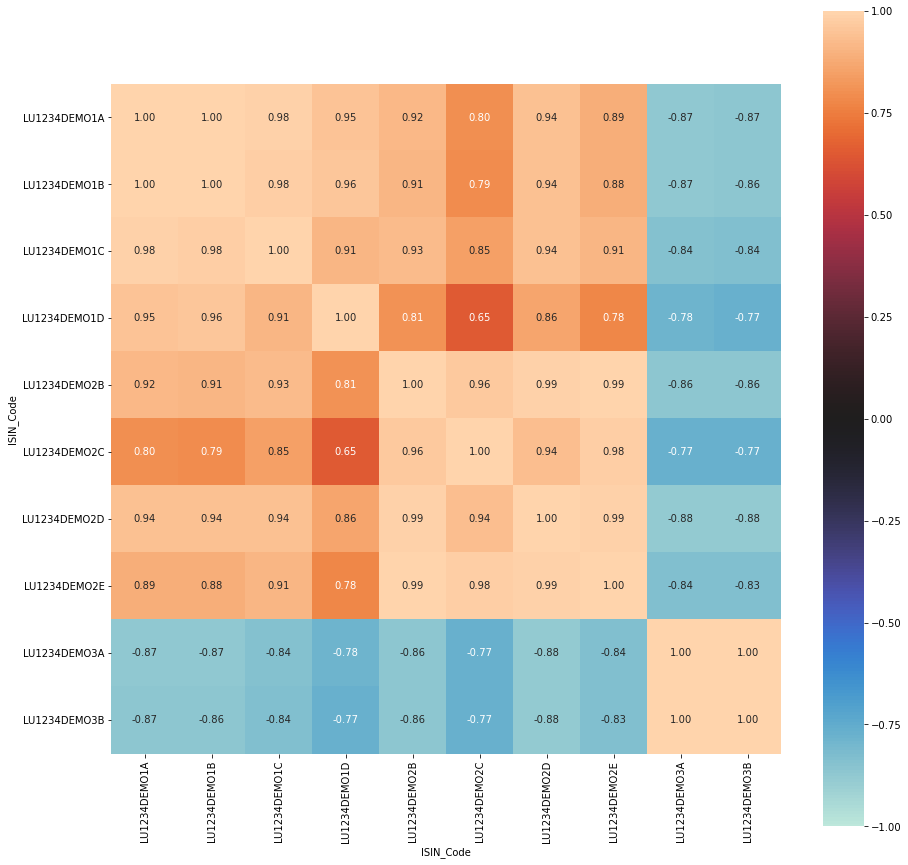

{'corr': ISIN_Code     LU1234DEMO1A  LU1234DEMO1B  LU1234DEMO1C  LU1234DEMO1D  \
 ISIN_Code                                                              
 LU1234DEMO1A      1.000000      0.999194      0.984486      0.953084   
 LU1234DEMO1B      0.999194      1.000000      0.979814      0.957655   
 LU1234DEMO1C      0.984486      0.979814      1.000000      0.911132   
 LU1234DEMO1D      0.953084      0.957655      0.911132      1.000000   
 LU1234DEMO2B      0.915147      0.911620      0.928647      0.808055   
 LU1234DEMO2C      0.800356      0.792713      0.849486      0.654594   
 LU1234DEMO2D      0.941065      0.939596      0.939285      0.860106   
 LU1234DEMO2E      0.887446      0.883218      0.910268      0.780968   
 LU1234DEMO3A     -0.872919     -0.869337     -0.840275     -0.782282   
 LU1234DEMO3B     -0.865298     -0.861188     -0.835392     -0.771064   
 
 ISIN_Code     LU1234DEMO2B  LU1234DEMO2C  LU1234DEMO2D  LU1234DEMO2E  \
 ISIN_Code                               

In [33]:
# Plot features correlations after deleting missing values
import dython.nominal
from dython.nominal import associations
instruments = ['LU1234DEMO1A', 'LU1234DEMO1B', 'LU1234DEMO1C',
       'LU1234DEMO1D', 'LU1234DEMO2B', 'LU1234DEMO2C', 'LU1234DEMO2D',
       'LU1234DEMO2E', 'LU1234DEMO3A', 'LU1234DEMO3B']
data_corr = NAV_Per_Share2[instruments]
associations(data_corr, nominal_columns=None, mark_columns=False, figsize=(15, 15))

In [34]:
# Second method
# Replacing missing values by mean
NAV_Per_Share3 = NAV_Per_Share.fillna(NAV_Per_Share.mean())
NAV_Per_Share3.head()

ISIN_Code,LU1234DEMO1A,LU1234DEMO1B,LU1234DEMO1C,LU1234DEMO1D,LU1234DEMO2B,LU1234DEMO2C,LU1234DEMO2D,LU1234DEMO2E,LU1234DEMO3A,LU1234DEMO3B,Valuation_date
Valuation_Date,,,,,,,,,,,
02/01/2018,111.687000,118.17700,126.354400,112.111800,37.111000,196.033400,132.443200,121.422000,2508.1490,244.1892,2018-01-02
03/01/2018,111.982000,118.49560,126.684800,112.406800,37.181800,196.682400,132.868000,121.823200,2517.0226,245.0270,2018-01-03
04/01/2018,112.100000,118.62540,126.814600,112.524800,37.252600,197.720800,133.564200,122.460400,2512.3262,244.5904,2018-01-04
05/01/2018,112.442200,118.97940,127.215800,112.867000,37.429600,198.452400,134.048000,122.920600,2513.3174,244.6848,2018-01-05
06/01/2018,104.033313,110.55232,120.083617,103.447309,36.248989,194.567191,129.066002,119.608467,2531.0174,246.4076,2018-01-06


In [35]:
# To check missing values in the new dataframe NAV_Per_Share3
print(NAV_Per_Share3.isnull().sum())

ISIN_Code
LU1234DEMO1A      0
LU1234DEMO1B      0
LU1234DEMO1C      0
LU1234DEMO1D      0
LU1234DEMO2B      0
LU1234DEMO2C      0
LU1234DEMO2D      0
LU1234DEMO2E      0
LU1234DEMO3A      0
LU1234DEMO3B      0
Valuation_date    0
dtype: int64


In [36]:
print("The new dataset for the correlations calculating after replacing missing values by the mean size is  " + str(NAV_Per_Share2.shape) )

The new dataset for the correlations calculating after replacing missing values by the mean size is  (198, 11)


C:\Users\sako_\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


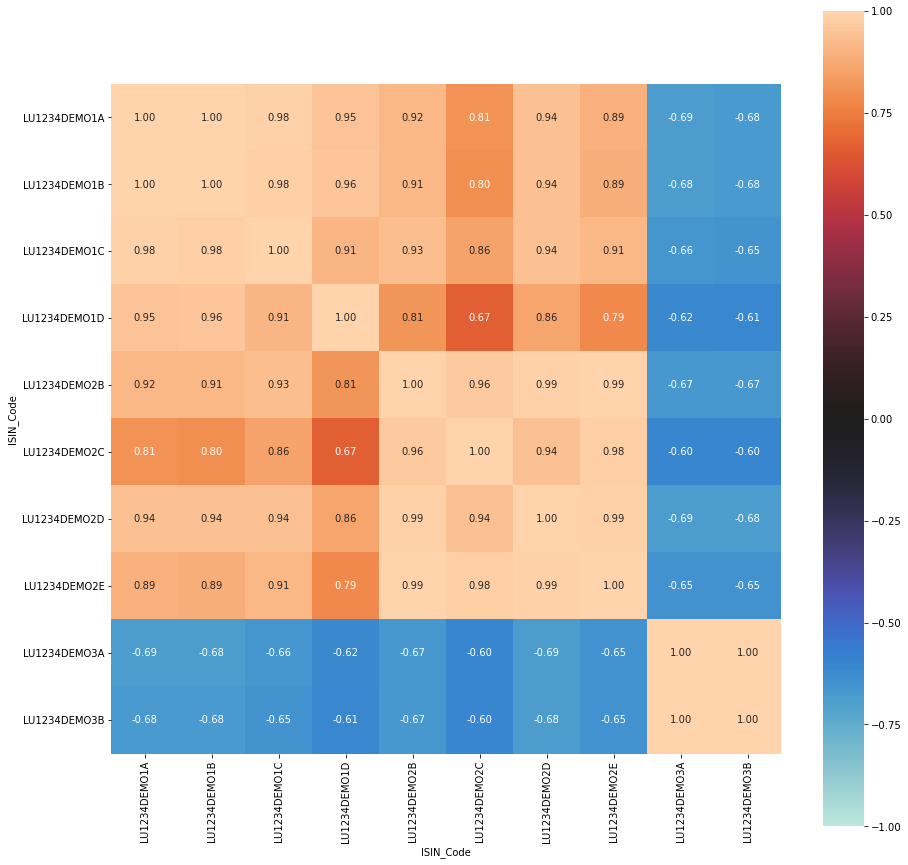

{'corr': ISIN_Code     LU1234DEMO1A  LU1234DEMO1B  LU1234DEMO1C  LU1234DEMO1D  \
 ISIN_Code                                                              
 LU1234DEMO1A      1.000000      0.999229      0.984813      0.952694   
 LU1234DEMO1B      0.999229      1.000000      0.980247      0.957475   
 LU1234DEMO1C      0.984813      0.980247      1.000000      0.910951   
 LU1234DEMO1D      0.952694      0.957475      0.910951      1.000000   
 LU1234DEMO2B      0.918497      0.914627      0.931517      0.813248   
 LU1234DEMO2C      0.809536      0.801621      0.857360      0.665168   
 LU1234DEMO2D      0.943310      0.941546      0.941734      0.862866   
 LU1234DEMO2E      0.892234      0.887733      0.914532      0.786673   
 LU1234DEMO3A     -0.685383     -0.681962     -0.657398     -0.616664   
 LU1234DEMO3B     -0.679491     -0.675660     -0.653666     -0.607905   
 
 ISIN_Code     LU1234DEMO2B  LU1234DEMO2C  LU1234DEMO2D  LU1234DEMO2E  \
 ISIN_Code                               

In [37]:
# Plot features correlations replacing missing values by means of features
from dython.nominal import associations
instruments = ['LU1234DEMO1A', 'LU1234DEMO1B', 'LU1234DEMO1C',
       'LU1234DEMO1D', 'LU1234DEMO2B', 'LU1234DEMO2C', 'LU1234DEMO2D',
       'LU1234DEMO2E', 'LU1234DEMO3A', 'LU1234DEMO3B']
data_corr2 = NAV_Per_Share3[instruments]
associations(data_corr2, nominal_columns=None, mark_columns=False, figsize=(15, 15))

* **Replacing the missing values with the mean leads to a decrease in the intensity of correlation for the variables 'LU1234DEMO3A' and 'LU1234DEMO3B'**

#### * 4 * Creating of firebase project named : #NGTtest

##### * 5 * Connecting firebase project to python

In [40]:
import firebase_admin
from firebase_admin import credentials

cred = credentials.Certificate("C:/Users/sako_/OneDrive/Bureau/Next_gate_tech/sercive_account_key.json")
firebase_admin.initialize_app(cred)

In [48]:
# Export data gotten from quality checks in csv file
NAV_Per_Share2.to_csv('df_miss_val_drop.csv', index = False)
NAV_Per_Share3.to_csv('df_miss_valu_rep_mean.csv', index = False)

In [49]:
# Connecting firestore to python
import google.cloud
from firebase_admin import credentials, firestore


store = firestore.client()
doc_ref = store.collection(u'users').limit(3)

try:
    docs = doc_ref.get()
    for doc in docs:
        print(u'Doc Data:{}'.format(doc.to_dict()))
except google.cloud.exceptions.NotFound:
    print(u'Missing data')

Missing data


In [56]:
# Exporting of key results from data quality check
# Two datasets from data quality check served to calculate the correlations between the 11 share series.

import csv
import firebase_admin
import google.cloud
from firebase_admin import credentials, firestore


store = firestore.client()

file_path = "df_miss_val_drop.csv"
collection_name = "Data_missval_drop"


def batch_data(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]


data = []
headers = []
with open(file_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            for header in row:
                headers.append(header)
            line_count += 1
        else:
            obj = {}
            for idx, item in enumerate(row):
                obj[headers[idx]] = item
            data.append(obj)
            line_count += 1
    print(f'Processed {line_count} lines.')


for batched_data in batch_data(data, 499):
    batch = store.batch()
    for data_item in batched_data:
        doc_ref = store.collection("Data_missval_drop").document()
        batch.set(doc_ref, data_item)
    batch.commit()

print('Done')

Processed 199 lines.
Done


In [58]:

store = firestore.client()

file_path = "df_miss_valu_rep_mean.csv"
collection_name = "df_missval_mean"


def batch_data(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]


data = []
headers = []
with open(file_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            for header in row:
                headers.append(header)
            line_count += 1
        else:
            obj = {}
            for idx, item in enumerate(row):
                obj[headers[idx]] = item
            data.append(obj)
            line_count += 1
    print(f'Processed {line_count} lines.')

for batched_data in batch_data(data, 499):
    batch = store.batch()
    for data_item in batched_data:
        doc_ref = store.collection("df_missval_mean").document()
        batch.set(doc_ref, data_item)
    batch.commit()

print('Done')


Processed 304 lines.
Done


In [57]:
#checking if the results are succesfully exported
store = firestore.client()
doc_ref = store.collection(u'Data_missval_drop')

data = []

docs = doc_ref.get()
for doc in docs:
    data.append(doc.to_dict())
print(len(data))

199


In [ ]:
#  The Firebase security rules Configuring
rules_version = '2';
service cloud.firestore {
  match /databases/{database}/documents {
    match /{document=**} {
      allow read, write: if false;
    }
  }
}